# Introduction
Try to see whether there's any predictive power in the dataset for _prices_.

### Imports
Import libraries and write settings here.

In [27]:
# Data manipulation
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

df_drugs = pd.read_csv('dataset_1.csv')
df_vendors = pd.read_csv('dataset_vendor.csv')
df_drugs.drop(['Unnamed: 0'], axis=1, inplace=True)
df_vendors.drop(['Unnamed: 0'], axis=1, inplace=True)

# Analysis/Modeling
Do work here

In [28]:
df_drugs.head(2)

,vendor,category_level_1,category_level_2,category_level_3,highest_category,product,price in $,shipping_from,shipping_to
0,greenleafde,Drugs and Chemicals,Cannabis & Hash,Buds & Flowers,Buds & Flowers,5G HINDU KUSH [FASTSHIP],71.00,Germany,Worldwide
1,RS7,Drugs and Chemicals,Stimulants,Cocaine,Cocaine,**(4.5G)** Pure Colombian Cocaine (UNCUT),324.92,Netherlands,Worldwide


<AxesSubplot:>

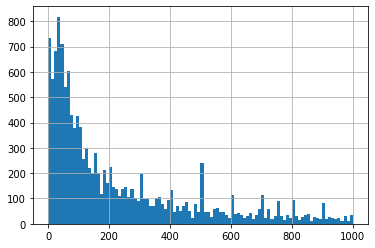

In [29]:
df_drugs['price in $'].hist(bins=100)

In [10]:
df_vendors.head(2)

,vendor,rank,verifcation,since,transactions,feedback_total,feedback_positive,feedback_negative,disputes_total,disputes_won,disputes_lost,finalize_early
0,2GD4DN,Rank 1,Verification Level 1,"Jun 9, 2020",33,17,82.35% (14),17.65% (3),2,50% (1),0% (0),Not Available
1,420Quality,Rank 0,Verification Level 4,"Oct 29, 2020",0,0,0% (0),0% (0),0,0% (0),0% (0),Not Available


In [30]:
df_merged = df_drugs.merge(df_vendors, on='vendor', how='left')
df_merged['category_level_2'].fillna("Uncategorized", inplace=True);
df_merged['category_level_3'].fillna("Uncategorized", inplace=True);
df_merged

,vendor,category_level_1,category_level_2,category_level_3,highest_category,product,price in $,shipping_from,shipping_to,rank,verifcation,since,transactions,feedback_total,feedback_positive,feedback_negative,disputes_total,disputes_won,disputes_lost,finalize_early
0,greenleafde,Drugs and Chemicals,Cannabis & Hash,Buds & Flowers,Buds & Flowers,5G HINDU KUSH [FASTSHIP],71.00,Germany,Worldwide,Rank 5,Verification Level 2,"Jul 11, 2020",463,236,88.56% (209),7.20% (17),18,33.33% (6),44.44% (8),Not Available
1,RS7,Drugs and Chemicals,Stimulants,Cocaine,Cocaine,**(4.5G)** Pure Colombian Cocaine (UNCUT),324.92,Netherlands,Worldwide,Rank 5,Verification Level 3,"Oct 5, 2020",547,257,84.82% (218),8.17% (21),38,13.16% (5),23.68% (9),Not Available
2,dexterslabs,Drugs and Chemicals,Prescriptions Drugs,Uncategorized,Prescriptions Drugs,280x Pills 10 boxes Codeine Phosphate 30mg,251.09,United Kingdom,United Kingdom,Rank 4,NaN,"Sep 15, 2020",384,229,99.56% (228),0% (0),5,0% (0),20% (1),Not Available
3,heyzeus,Drugs and Chemicals,Cannabis & Hash,Buds & Flowers,Buds & Flowers,AAA+ Blue Ice Indoor Hydro 1/4lb FREE SHIPPING,680.00,United States,United States,Rank 0,Verification Level 3,"Dec 4, 2020",0,0,0% (0),0% (0),0,0% (0),0% (0),Not Available
4,timmy622,Drugs and Chemicals,Stimulants,Cocaine,Cocaine,7g Benzocaine 99.9% Pure | Free UK Delivery,9.76,United Kingdom,Worldwide,Rank 1,Verification Level 2,"Dec 18, 2020",29,16,100% (16),0% (0),0,0% (0),0% (0),Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13272,wedoweed,Drugs and Chemicals,Cannabis & Hash,Vaping,Vaping,THC Vape Juice (Sativa) 30ml (Free Shipping),85.68,Australia,Australia,Rank 2,Verification Level 2,"Oct 18, 2020",159,78,100% (78),0% (0),0,0% (0),0% (0),Not Available
13273,CornerShop,Drugs and Chemicals,Uncategorized,Uncategorized,Drugs and Chemicals,"Kush no. 1 liquid e cigartette, E Zigarette",24.07,Germany,Europe,Rank 0,NaN,"Jan 31, 2021",9,1,100% (1),0% (0),1,0% (0),0% (0),Not Available
13274,CornerShop,Drugs and Chemicals,Uncategorized,Uncategorized,Drugs and Chemicals,Fentanyl Pflaster abgelaufen,42.12,Germany,Europe,Rank 0,NaN,"Jan 31, 2021",9,1,100% (1),0% (0),1,0% (0),0% (0),Not Available
13275,CornerShop,Drugs and Chemicals,Cannabis & Hash,Hash,Hash,Morocco Hash,9.63,Germany,Europe,Rank 0,NaN,"Jan 31, 2021",9,1,100% (1),0% (0),1,0% (0),0% (0),Not Available


In [67]:
def plot_category_wise(category, threshold=100):
    freq = df_merged[category].value_counts()
    # Select frequent values. Value is in the index.
    frequent_values = freq[freq >= threshold].index
    # Return only rows with value frequency above threshold.
    df_temp = df_merged[df_merged[category].isin(frequent_values)]
    
    fig_category_avg_prices = px.strip(df_temp.groupby(category)[['price in $']].mean().reset_index().sort_values(
    by='price in $', ascending=False),
    x="price in $", y=category, color=category)

    fig_category_avg_prices.show()

In [34]:
df_merged.groupby('category_level_2')[['price in $']].mean()

,price in $
category_level_2,
Accessories,43.093000
Benzos,216.410224
Cannabis & Hash,203.742086
Dissociatives,279.170443
Ecstasy,256.314768
Opiates,252.075618
Prescriptions Drugs,107.340745
Psychedelics,217.604854
Steroids,79.228082


In [35]:
df_merged.groupby('category_level_3')[['price in $']].mean()

,price in $
category_level_3,
2C-B,237.901208
4-FA,193.642500
5-MeO-DMT,260.382222
Adderal,291.605909
Buds & Flowers,220.985094
...,...
TMA,103.413750
Topical,65.398125
Uncategorized,186.744673


In [36]:
df_merged.groupby('shipping_from')[['price in $']].mean()

,price in $
shipping_from,
Australia,323.725352
Austria,176.449375
Belgium,180.731600
Bulgaria,153.432500
Canada,270.587571
...,...
Sweden,203.018462
Switzerland,244.720000
Turks and Caicos Islands,50.000000


In [58]:
plot_category_wise('shipping_from', 100)

In [56]:
plot_category_wise('shipping_to', 100)

In [74]:
def plot_category_wise_unsorted(category, threshold=100):
    freq = df_merged[category].value_counts()
    # Select frequent values. Value is in the index.
    frequent_values = freq[freq >= threshold].index
    # Return only rows with value frequency above threshold.
    df_temp = df_merged[df_merged[category].isin(frequent_values)]
    
    fig_category_avg_prices = px.strip(df_temp.groupby(category)[['price in $']].mean().reset_index(),
    x="price in $", y=category, color=category)

    fig_category_avg_prices.show()
    
plot_category_wise_unsorted('rank', 50)

In [66]:
plot_category_wise('verifcation')

In [69]:
plot_category_wise('transactions')

In [70]:
plot_category_wise('feedback_total')

In [75]:
plot_category_wise_unsorted('feedback_positive')

In [76]:
plot_category_wise_unsorted('feedback_negative')

In [79]:
plot_category_wise_unsorted('since')

In [80]:
plot_category_wise('disputes_total')

In [82]:
plot_category_wise_unsorted('disputes_won')

In [83]:
plot_category_wise('disputes_lost')

In [84]:
# We want to find a price per g/pill/mg

In [ ]:
shipping_from, shipping_to, rank, verification, since, transactions, feedback_total, feedback_positive, feedback_negative, disputes_total, disputes_won, disputes_lost

In [20]:
df_drugs['category_level_2'].value_counts()

Cannabis & Hash        3403
Stimulants             2657
Psychedelics           1230
Benzos                 1072
Ecstasy                1057
Opiates                1027
Prescriptions Drugs     631
Dissociatives           519
Steroids                417
Weight Loss              28
Tobacco                  15
Accessories              10
Name: category_level_2, dtype: int64

In [23]:
Y = np.asarray(df_drugs['price in $'])
X = np.asarray(df_drugs['category_level_2'])
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

TypeError: '>=' not supported between instances of 'str' and 'float'

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here